In [1]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
print(script_dir)

C:\Users\pinak\Documents\Github\NMA
C:\Users\pinak\Documents\Github\NMA\experiments\task


In [2]:
# import remaining modules
import task
import methods 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

In [3]:
# set up conditions and collect list
db_path = '../../data/hcp_task'
group = task.Group(db_path)
conditions_0 = ['0bk_body', '0bk_faces', '0bk_places', '0bk_tools']
conditions_2 = ['2bk_body', '2bk_faces', '2bk_places', '2bk_tools']
X_0, Y_0 = group.extract_cons(conditions_0)
X_0 = group.normalize_individuals(X_0)

#X_2, Y_2 = group.extract_cons(conditions_2)

Time taken by extract_con is 0.6981906890869141 seconds
Time taken by extract_con is 0.6740741729736328 seconds
Time taken by extract_con is 0.6629993915557861 seconds
Time taken by extract_con is 0.6945228576660156 seconds
Time taken by extract_cons is 2.874804973602295 seconds
Time taken by normalize_individuals is 0.6039886474609375 seconds


In [4]:
print(X_0[0,1,:])

[-2.22542495  0.4749557   0.36894902 -0.04112945 -1.2685752   1.36764352
  1.03009594  2.72062349  0.81250328 -0.06344664  1.38159177  0.75949994
  0.67581046  0.03419109 -0.61021793  0.13182882  0.03977039 -0.74691075
  0.27689059 -0.13876718 -0.10250173 -1.0091378  -2.0078323   1.37322282
 -0.37588738 -1.87671878 -1.16814782 -0.19734982 -0.70227636 -0.40657352
 -0.62137653 -0.33404264 -0.71343496  0.7288138  -0.61858688 -0.71064531
 -1.39968872 -0.95055516 -1.65075717  0.68696906  0.86271697  0.51959009
  0.19599076  0.43032131  2.14316606  1.58802582  0.76228959  1.07751998
  0.06487723 -1.01192745  0.75392064  0.82645153  1.30348158 -0.37867703
  0.09277373 -0.54326635 -0.82502094 -0.7775969  -0.49026301  1.4624916
 -1.47500926 -1.17651677 -0.56279389 -1.07608939 -0.47352511 -0.27546
 -0.65764197 -1.21557186  0.68417941  0.00350494 -0.04670875 -0.62974548
  1.9478906   0.78181714 -0.0271812   0.51401079  1.74424619  0.9603547 ]


In [5]:
# calculate principal components
pca = methods.PCA()
n_comps = 300
new_X_0, new_Y_0 , var = pca.lenca(X_0, n_comps)

Time taken by lenca is 3.492995500564575 seconds


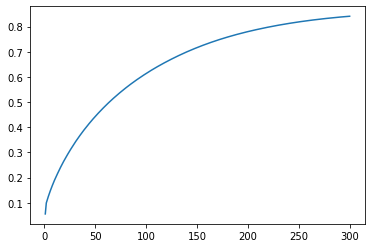

(1440, 300)


In [6]:
v = np.cumsum(var)
plt.plot(range(1, n_comps+1), v)
plt.show()
print(new_X_0.shape)

In [7]:
# calculate principal components
pca = methods.PCA()
n_comps = 300
new_X_0, new_Y_0 , var = pca.pca_roi(X_0, Y_0, n_comps)

Time taken by pca_roi is 3.968290090560913 seconds


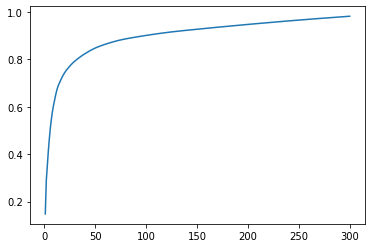

(105768, 300)


In [8]:
v = np.cumsum(var)
plt.plot(range(1, n_comps+1), v)
plt.show()
print(new_X_0.shape)

In [17]:
# apply SVM on PCA data
# calculate principal components
pca = methods.PCA()
n_comps = 30
new_X_0 = group.squash_frames(X_0)
new_X_0, _ = pca.regular(new_X_0, n_comps)
print(new_X_0.shape)
svm_0 = methods.SVM(kernel='rbf', gamma=0.7, C=100.0)
#x, y = shuffle(new_X_0, new_Y_0)
svm_0.cross_val_diy(new_X_0, Y_0)
#print(svm_0.scores)

Time taken by squash_frames is 2.4287095069885254 seconds
(1356, 30)
Time taken by massive_shuffle is 0.031008481979370117 seconds
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
test [3 0 3 0 1 0 2 3 1 0 0 3 1 0 2 2 0 0 3 2 3 0 0 1 0 0 1 0 3 3 3 3 1 0 3 2 0
 3 0 0 0 1 2 3 1 1 2 0 2 2 2 2 3 1 1 2 3 0 0 0 0 1 0 1 0 0 2 0 3 3 1 1 0 2
 3 2 0 0 1 3 1 1 2 0 3 3 1 2 2 3 1 2 1 1 0 1 2 2 1 3 3 3 3 2 0 1 3 3 1 0 2
 2 0 0 3 1 0 0 2 1 0 3 2 2 3 2 1 0 3 3 3 2 1 0 1 2 1 1 2 2 3 1 2 3 2 1 2 3
 0 0 1 1 1 2 2 3 0 3 2 0 0 3 1 2 0 2 0 2 1 2]
train [1 2 2 0 2 2 1 1 1 3 0 0 0 1 1 3 0 1 1 2 3 3 0 0 3 2 0 2 0 3 0 0 0 3 0 3 2
 0 1 3 1 0 2 3 2 1 0 3 3 1 3 2 2 3 2 3 0 1 2 2 2 3 0 1 1 0 0 0 1 0 2 3 3 3
 0 1 2 0 2 3 0 1

SVC(C=100.0, gamma=0.7)

In [26]:
# apply SVM on PCA data
# calculate principal components
pca = methods.PCA()
n_comps = 30
new_X_0, new_Y_0, _ = pca.lenca(X_0, n_comps)
print(new_X_0.shape)
svm_0 = methods.SVM(kernel='rbf', gamma=40.0, C=10.0)
#x, y = shuffle(new_X_0, new_Y_0)
svm_0.cross_val_diy(new_X_0, new_Y_0)
print(svm_0.scores)

Time taken by lenca is 1.4308605194091797 seconds
(1440, 30)
Time taken by massive_shuffle is 0.031998634338378906 seconds
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
test [1 1 2 1 2 3 0 3 1 1 2 2 0 2 2 0 1 1 2 0 1 2 3 3 2 0 3 0 3 3 1 1 2 0 3 1 0
 3 2 0 2 1 3 2 1 3 3 1 3 2 3 2 1 0 1 3 0 0 0 3 3 0 3 0 3 1 2 1 3 3 2 1 2 0
 3 1 0 2 2 2 0 0 0 1 2 0 2 0 2 2 2 1 1 3 3 2 2 3 0 1 3 1 2 0 1 2 3 1 0 2 3
 2 0 2 0 0 0 0 1 2 0 0 2 0 0 1 2 2 0 0 0 1 0 2 3 3 3 3 3 2 1 1 1 3 1 2 1 3
 3 2 2 2 2 0 1 3 2 3 2 3 0 2 2 2 3 1 1 1 0 3 3 3 2 3 2 1 2 2 0 0]
train [3 0 0 3 2 1 0 2 2 1 2 2 1 0 3 2 0 1 3 2 0 1 3 2 3 1 1 2 0 2 3 1 3 0 1 3 0
 2 1 3 1 0 2 2 3 1 2 3 1 3 3 0 2 3 3 2 3 3 1 0 0 3 2 2 1 3 

In [13]:
svm_0.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()